\begin{cases}
-u'' = 1 \quad \text{in} \quad (0,1) \\
u(0) = u(1) = 0
\end{cases}

In [16]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"


In [17]:

    from dolfin import *

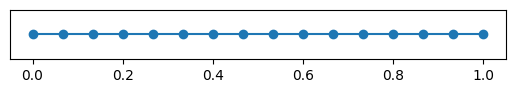

In [19]:
mesh = UnitIntervalMesh(15)

plot(mesh)

In [20]:
V = FunctionSpace(mesh, "Lagrange", 1)

print(V.dim())

16


In [21]:
v = TestFunction(V)
u = TrialFunction(V)

In [22]:
a = u.dx(0)*v.dx(0)*dx
b = v*dx

In [23]:
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 0) < DOLFIN_EPS


class Right(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1.) < DOLFIN_EPS


In [25]:
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

left = Left()
left.mark(boundaries,1)
right = Right()
right.mark(boundaries,2)

In [26]:
bcs = [DirichletBC(V, 0.0, boundaries, 1), DirichletBC(V, 0.0, boundaries, 2)]

In [27]:
solution = Function(V)

In [ ]:
solve(a==b, solution, bcs)

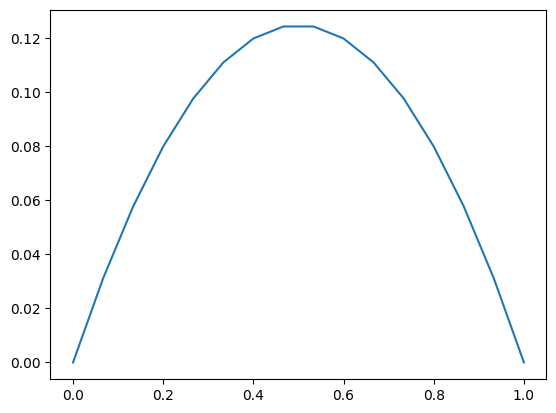

In [29]:
plot(solution, "title = 1d solution")